In [1]:
import warnings
warnings.filterwarnings("ignore")

# 패션 MNIST
- 구두, 가방 , 옷들의 이미미지로 구성
- 총 10개 class
- 28 pixel * 28 pixel = 784의 feture로 구성

In [3]:
!pip install tensorflow

     |████████████████████████████████| 228.5 MB 9.7 kB/s eta 0:00:01    |█▌                              | 10.6 MB 634 kB/s eta 0:05:44     |██▏                             | 15.5 MB 501 kB/s eta 0:07:05     |███████▌                        | 53.2 MB 1.7 MB/s eta 0:01:47     |█████████████████████████████▍  | 209.7 MB 858 kB/s eta 0:00:22
     |████████████████████████████████| 1.6 MB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 438 kB 891 kB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 840 kB/s eta 0:00:01
     |████████████████████████████████| 961 kB 856 kB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 114 kB/s eta 0:00:01
     |████████████████████████████████| 123 kB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 13.2 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 699 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 685 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6

In [4]:
# 데이터 붑ㄹ러오기
from tensorflow import keras
(train_input,train_target), (test_input,test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


> 총 데이터 70000개 

In [6]:
# train data
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [8]:
# train의 target data 파악 
train_target[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

0 : 티셔츠 <br>
1 : 팬츠<br>
2 : 스웨터<br>
3 : 드레스<br>
4 : 코트<br>
5 : 샌들<br>
6 : 셔츠<br>
7 : 스니커즈<br>
8 : 백<br>
9 : 앵클부츠 

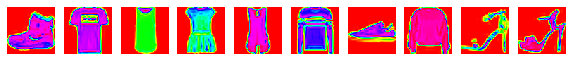

In [11]:
# train_input의 모양 10개 시각화 
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap="hsv")
    axs[i].axis("off")
plt.show()


In [12]:
# train_target의 종류 및 갯수 파악 
import numpy as np
np.unique(train_target,return_counts =True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

---
### 로직스틱 회귀로 패션아이템 분류하기

In [13]:
# 데이터 표준화 및 2차 행렬로 만들기
train_scaled = train_input / 255.0  # 255= Rgb
# 2^8 = 256 0~255
# (R,G,B) = (0~255, 0~255,0~255)
train_scaled = train_scaled.reshape(-1, 28*28)  # 28 *28 => train_input의 행렬  

In [14]:
# dimension 확인
train_scaled.shape

(60000, 784)

In [17]:
# 로지스틱 회귀 모델
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss="log", max_iter=5,random_state=42) # 손실함수 => sigmoid 함수 
# max_iter = 100으로 하면 warning message가 없으나 뒷부부분의 인공신경망과 동일환 횟수를 구성하려고 5로 했음
# loss = 손실함수
# max_iter = 반복학습
# sklearn에는 손실함수 log뿐이 없다, 원래 log는 이진분류이나 
# 위의 예제는 다중분류이다. 이때 OVR(One Versus Rest: 하나와 나머지 )방식으로 10개의 컬럼 중 1개를 정하고 나머지 9개는 나머지로 정하여 사용한 후에 
# sigmoid나 softmax의 확률 변수로 정의한다. 

scores = cross_validate(sc, train_scaled,train_target,n_jobs=-1) 
# n_jobs=-1 => 모든 cpu 사용
np.mean(scores['test_score'])


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum num

0.8192833333333333

---
### 인공신경망

- 지금 간단한 인공신경망 입력층과 출력층
- 경사하강법을 사용한 로지스틱 회귀나 경사하강법을 사용한 선형회귀와 거의 똑같은 구조

### TensorFlow 와 Keras
- TensorFlow는 2015년 구글에서 opensource 로 발표, 이와 비슷한 기능이 pytorch가 있는데 2016년에 facebook에서 발표
- Pytorch는 tensorflow보다 코딩량이 적다 
- tensorflow만으로 작업을 하게 되면 너무 복잡한 코딩을 하게 된다.
- 이를 기존 방법처럼 간단하게 처리할 수 있는 방법이 keras다.
- keras는 2015년(프랑스와 솔레)에 tensorflow보다 먼저 사용되고 있었고 씨아노(gpu사용)라는 묘듈을 기반으로 작성되어 있었다.
- keras 개발자가 구글에 입사하여 tensorflow를 쉽게 처리할 수 있도록 제작하였다.
- 최근에는 tensorflow 와 keras는 거의 동의어로 부른다.


In [18]:
from sklearn.model_selection import train_test_split
# 훈련, 검증
train_scaled, val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2, random_state=42
)
# test_size = val_target

In [19]:
# dimensions 확인
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)


(48000, 784) (48000,)
(12000, 784) (12000,)


<img src="../Data/출력층.png" width=400>

In [20]:
# 가장 기본이 되는 출력층 만들기 
dense = keras.layers.Dense(10, activation="softmax", input_shape=(784,))
# dense => 밀집층
# 10개 노드를 가진 출력층과 입력값은 784개(28*28)이며 출력층이 하나이므로 첫번째 입력되는 중에서 input_shape를 정의 
# 현재 은닉층이 없으므로
# 다중 분류이므로 activation은 softmax를 사용, 이진분류라면 sigmoid로 표시
# 출력층의 갯수는 클래스의 갯수와 동일해야하함

In [23]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [24]:
# 모델이 추가되는 층은 출력층 하나뿐임 (입력층은 모델이 포함이 안됨 )

# keras의 전체 모델에 층을 추가한다.
model = keras.Sequential(dense)

### 모델 설정하기 

In [29]:
# 손실함수 지정
model.compile(loss="sparse_categorical_crossentropy",metrics='accuracy')
# 다중분류 
# 정수값으로 target datfmf 사용하고 싶으면 loss함수명 앞에  => sparse_
# metrics ="accuracy"
# 이진분류는 biniary_crossentropy를 사용하고 다중분류인 경우애는 categroical_crossentropy

## 위의 손실함수를 사용 시 one-hot encoding 결과로 나옴

In [30]:
# 현재의 target 확인 
train_target[:10]

array([7, 3, 5, 8, 6, 9, 3, 3, 9, 9], dtype=uint8)

In [31]:
### 모델 훈련
model.fit(train_scaled,train_target, epochs=20)
# epoch 반복학습

Epoch 1/20
1500/1500 [==============================] - 3s 1ms/step - loss: 0.6054 - accuracy: 0.7940
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4785 - accuracy: 0.8388
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4548 - accuracy: 0.8472
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4438 - accuracy: 0.8529
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4355 - accuracy: 0.8565
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4312 - accuracy: 0.8565
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4267 - accuracy: 0.8581
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4249 - accuracy: 0.8608
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4220 - accuracy: 0.8618
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.419

In [32]:
# 검증 데이터로 확인
model.evaluate(val_scaled,val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.4544 - accuracy: 0.8541


[0.45444828271865845, 0.8540833592414856]